
Experiment 1 with params: {'hidden_dim': 16, 'num_layers': 2, 'learning_rate': 0.01}
Epoch 0, Loss: 1.9459, Accuracy: 0.3490
Epoch 10, Loss: 0.7067, Accuracy: 0.7980
Epoch 20, Loss: 0.1401, Accuracy: 0.8120
Epoch 30, Loss: 0.0348, Accuracy: 0.8100
Epoch 40, Loss: 0.0172, Accuracy: 0.8050
Epoch 50, Loss: 0.0147, Accuracy: 0.8100
Epoch 60, Loss: 0.0160, Accuracy: 0.8120
Epoch 70, Loss: 0.0176, Accuracy: 0.8090
Epoch 80, Loss: 0.0181, Accuracy: 0.8080
Epoch 90, Loss: 0.0175, Accuracy: 0.8050


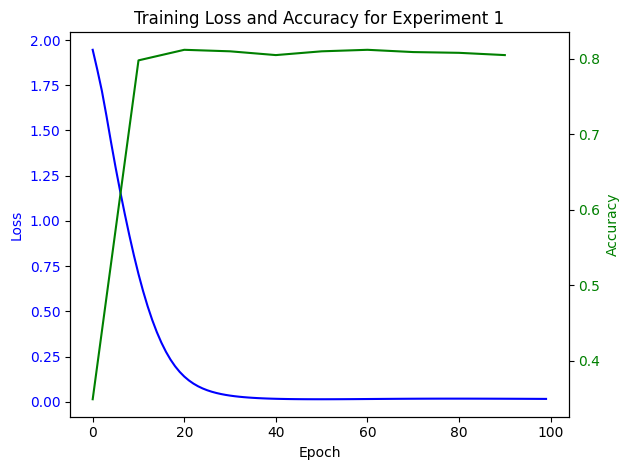

Final Metrics - Accuracy: 0.8050, Precision: 0.8156, Recall: 0.8050, F1-Score: 0.8066

Experiment 2 with params: {'hidden_dim': 32, 'num_layers': 2, 'learning_rate': 0.01}
Epoch 0, Loss: 1.9472, Accuracy: 0.5990
Epoch 10, Loss: 0.2486, Accuracy: 0.8040
Epoch 20, Loss: 0.0222, Accuracy: 0.7960
Epoch 30, Loss: 0.0071, Accuracy: 0.7990
Epoch 40, Loss: 0.0064, Accuracy: 0.8030
Epoch 50, Loss: 0.0091, Accuracy: 0.8100
Epoch 60, Loss: 0.0125, Accuracy: 0.8140
Epoch 70, Loss: 0.0140, Accuracy: 0.8100
Epoch 80, Loss: 0.0135, Accuracy: 0.8070
Epoch 90, Loss: 0.0126, Accuracy: 0.8110


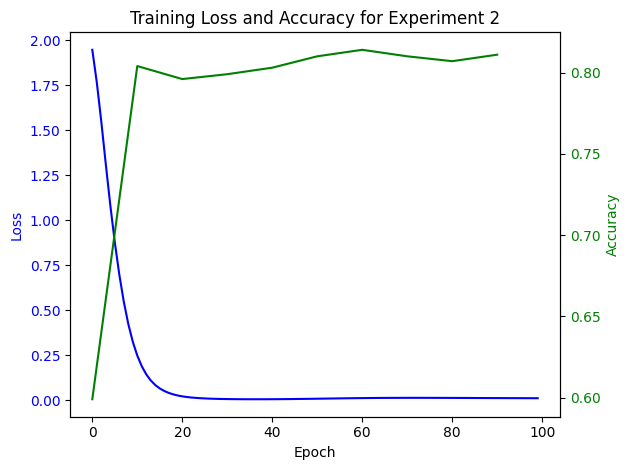

Final Metrics - Accuracy: 0.8140, Precision: 0.8242, Recall: 0.8140, F1-Score: 0.8155

Experiment 3 with params: {'hidden_dim': 16, 'num_layers': 1, 'learning_rate': 0.005}
Epoch 0, Loss: 2.7648, Accuracy: 0.1800
Epoch 10, Loss: 2.0739, Accuracy: 0.5900


e:\Work\_AMine\AI\Uni.HW.GNN\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20, Loss: 1.4648, Accuracy: 0.6700
Epoch 30, Loss: 1.0075, Accuracy: 0.6970
Epoch 40, Loss: 0.7014, Accuracy: 0.7190
Epoch 50, Loss: 0.5074, Accuracy: 0.7230
Epoch 60, Loss: 0.3852, Accuracy: 0.7250
Epoch 70, Loss: 0.3064, Accuracy: 0.7270
Epoch 80, Loss: 0.2539, Accuracy: 0.7270
Epoch 90, Loss: 0.2174, Accuracy: 0.7320


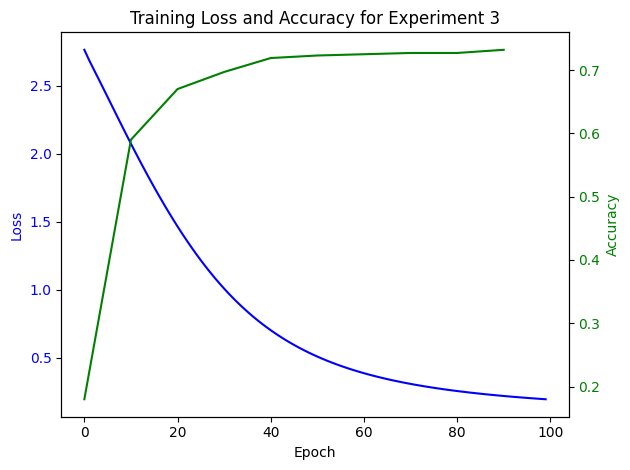

Final Metrics - Accuracy: 0.7270, Precision: 0.7484, Recall: 0.7270, F1-Score: 0.7283

Experiment 4 with params: {'hidden_dim': 32, 'num_layers': 1, 'learning_rate': 0.005}
Epoch 0, Loss: 3.4764, Accuracy: 0.1870
Epoch 10, Loss: 2.7483, Accuracy: 0.5600


e:\Work\_AMine\AI\Uni.HW.GNN\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20, Loss: 2.0193, Accuracy: 0.6680
Epoch 30, Loss: 1.4240, Accuracy: 0.7030
Epoch 40, Loss: 0.9952, Accuracy: 0.7190
Epoch 50, Loss: 0.7127, Accuracy: 0.7210
Epoch 60, Loss: 0.5322, Accuracy: 0.7310
Epoch 70, Loss: 0.4155, Accuracy: 0.7280
Epoch 80, Loss: 0.3379, Accuracy: 0.7300
Epoch 90, Loss: 0.2843, Accuracy: 0.7320


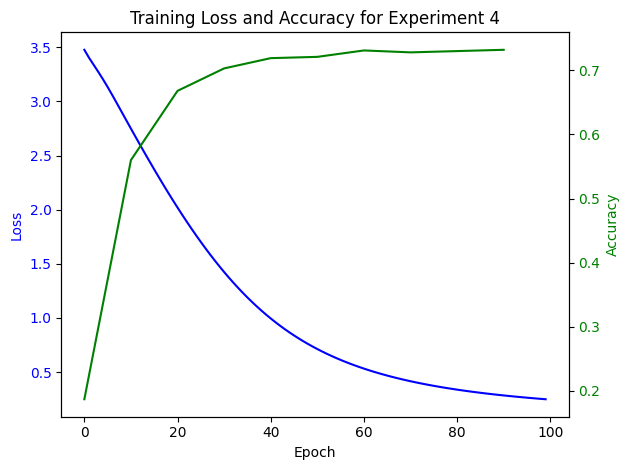

Final Metrics - Accuracy: 0.7330, Precision: 0.7524, Recall: 0.7330, F1-Score: 0.7344

Experiment 5 with params: {'hidden_dim': 64, 'num_layers': 2, 'learning_rate': 0.001}
Epoch 0, Loss: 1.9381, Accuracy: 0.2530
Epoch 10, Loss: 1.5909, Accuracy: 0.7440
Epoch 20, Loss: 1.1845, Accuracy: 0.8100
Epoch 30, Loss: 0.8189, Accuracy: 0.8000
Epoch 40, Loss: 0.5467, Accuracy: 0.8010
Epoch 50, Loss: 0.3654, Accuracy: 0.8040
Epoch 60, Loss: 0.2508, Accuracy: 0.8000
Epoch 70, Loss: 0.1796, Accuracy: 0.8020
Epoch 80, Loss: 0.1347, Accuracy: 0.8020
Epoch 90, Loss: 0.1056, Accuracy: 0.8000


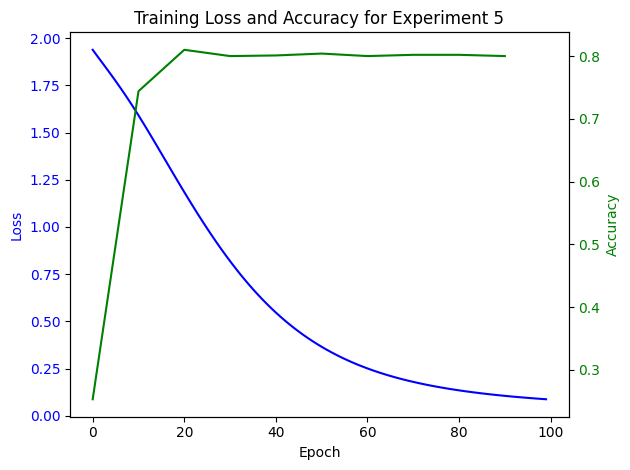

Final Metrics - Accuracy: 0.7970, Precision: 0.8108, Recall: 0.7970, F1-Score: 0.7987


In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Loading dataset
dataset = Planetoid(root='../data', name='Cora')
data = dataset[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

# Define a GCN model with flexibility for different numbers of layers
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(GCN, self).__init__()
        self.num_layers = num_layers
        self.conv1 = GCNConv(input_dim, hidden_dim)
        if num_layers > 1:
            self.conv2 = GCNConv(hidden_dim, output_dim)
        else:
            self.conv2 = None

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        if self.conv2 is not None:
            x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Function to train the model
def train(model, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Function to evaluate the model
def test(model):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        test_mask = data.test_mask
        pred = logits[test_mask].max(1)[1]
        acc = accuracy_score(data.y[test_mask].cpu(), pred.cpu())
        prec = precision_score(data.y[test_mask].cpu(), pred.cpu(), average='weighted')
        rec = recall_score(data.y[test_mask].cpu(), pred.cpu(), average='weighted')
        f1 = f1_score(data.y[test_mask].cpu(), pred.cpu(), average='weighted')
    return acc, prec, rec, f1

# Hyperparameter configurations
hyperparams = [
    {'hidden_dim': 16, 'num_layers': 2, 'learning_rate': 0.01},
    {'hidden_dim': 32, 'num_layers': 2, 'learning_rate': 0.01},
    {'hidden_dim': 16, 'num_layers': 1, 'learning_rate': 0.005},
    {'hidden_dim': 32, 'num_layers': 1, 'learning_rate': 0.005},
    {'hidden_dim': 64, 'num_layers': 2, 'learning_rate': 0.001}
]

# Running experiments with different hyperparameters
for i, params in enumerate(hyperparams):
    print(f"\nExperiment {i + 1} with params: {params}")
    
    model = GCN(input_dim=dataset.num_node_features, hidden_dim=params['hidden_dim'],
                output_dim=dataset.num_classes, num_layers=params['num_layers']).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=5e-4)
    
    losses = []
    accuracies = []
    
    # Training the model for a fixed number of epochs
    for epoch in range(100):  # Reduced to 100 epochs for quicker testing
        loss = train(model, optimizer)
        losses.append(loss)
        
        if epoch % 10 == 0:
            acc, prec, rec, f1 = test(model)
            accuracies.append(acc)
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    
    # Plot training loss and accuracy over epochs for this experiment
    fig, ax1 = plt.subplots()
    ax1.plot(losses, label='Loss', color='blue')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx()
    ax2.plot(range(0, 100, 10), accuracies, label='Accuracy', color='green')
    ax2.set_ylabel('Accuracy', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.title(f"Training Loss and Accuracy for Experiment {i + 1}")
    fig.tight_layout()
    plt.show()

    # Final evaluation
    acc, prec, rec, f1 = test(model)
    print(f"Final Metrics - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")